# Trained model summary

This notebook contains a summary over all trained CNNs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os

main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

In [2]:
models = []
for folder in os.listdir(main_path):
    data = []
    name =  folder.split('_')[-1]
    
    c = 0
    f = 0
    for letter in name:
        if letter=='c': c+=1
        if letter=='f': f+=1
    name_new = str(c)+'c_'+str(f)+'f'
    
    data.append(name_new)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    data.extend(df[df['Auc']==df['Auc'].max()].values.tolist()[0])
    
    modified_time = int(os.stat(path).st_mtime)
    date = time.localtime(modified_time)[0:6]
    data.extend(date)
    models.append(data)
    
df = pd.DataFrame(models, columns=['Name', 'Learning_Rate', 'Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes', 'Accuracy', 'Auc', 'Steps', 'Early_Stopped', 'Time', 'Title', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'])
df = df[['Name', 'Auc', 'Accuracy', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Learning_Rate', 'Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes', 'Steps', 'Early_Stopped', 'Time', 'Title']].sort_values(by='Auc', ascending=False)


df

,Name,Auc,Accuracy,Year,Month,Day,Hour,Minute,Second,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Steps,Early_Stopped,Time,Title
4,3c_3f,0.960318,90.750015,2017,6,29,9,10,24,0.001,225,5,9,35,100000,False,1452.800927,Dropout
2,3c_2f,0.956064,90.890014,2017,6,28,13,0,34,0.001,143,5,26,13,211000,True,5216.618046,Dropout
1,4c_3f,0.954281,89.940012,2017,6,28,14,11,1,0.001,215,3,8,234,287000,True,3689.826215,Dropout
11,3c_1f,0.952376,90.550005,2017,6,26,4,31,48,0.001,180,3,9,138,50000,False,672.932741,Random_Plotting
12,4c_1f,0.951235,90.370017,2017,6,25,13,30,14,0.001,178,3,10,208,50000,False,462.173625,Random_Plotting
9,5c_2f,0.950604,90.590006,2017,6,26,1,31,47,0.001,135,5,8,157,50000,False,1287.778864,Random_Plotting
8,5c_3f,0.950544,89.620012,2017,6,27,0,43,28,0.001,189,3,12,27,50000,False,815.150183,Random_Plotting
13,5c_1f,0.949882,90.690017,2017,6,26,6,52,18,0.001,166,3,8,202,50000,False,690.395214,Random_Plotting
0,4c_2f,0.949312,89.420003,2017,6,25,16,39,2,0.001,244,3,8,124,47000,True,916.823063,Random_Plotting
3,2c_2f,0.949224,89.640009,2017,6,24,14,57,19,0.001,256,3,14,12,50000,False,1866.986505,Optimizing


Good: 8 All: 16 Plotting_cccfff
Good: 0 All: 0 Plotting_cdccfff
Good: 0 All: 0 Plotting_ccdcfff
Good: 0 All: 0 Plotting_cccdfff
Good: 3 All: 4 Plotting_cccfdff
Good: 8 All: 9 Plotting_cccffdf
Good: 0 All: 0 Plotting_cccfdfdf
Good: 0 All: 0 Plotting_cccfdfdfd
Good: 0 All: 0 Plotting_cdcdcdfdfdfd
Good: 0 All: 0 Plotting_cdcdcdfdfdf
Good: 0 All: 0 Plotting_cdcdcdfff
Good: 5 All: 13 Plotting_cccfffd


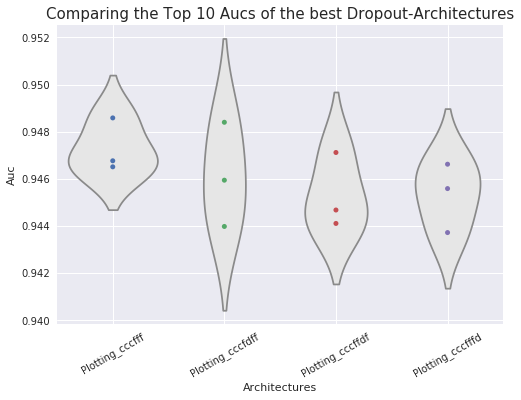

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

top = 10
main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'
folder = ['cccfff']

plot_auc = []
names = []
for folder in [path for path in os.listdir(main_path) if path.split('_')[-1] in folder]:
    name =  folder.split('_')[-1]
    c = 0
    f = 0
    for letter in name:
        if letter=='c': c+=1
        if letter=='f': f+=1
    name_new = str(c)+'c_'+str(f)+'f'
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')

    df = pd.read_csv(path)
    for run in ['Plotting_cccfff', 'Plotting_cdccfff','Plotting_ccdcfff','Plotting_cccdfff','Plotting_cccfdff','Plotting_cccffdf', 'Plotting_cccfdfdf', 'Plotting_cccfdfdfd', 'Plotting_cdcdcdfdfdfd', 'Plotting_cdcdcdfdfdf', 'Plotting_cdcdcdfff', 'Plotting_cccfffd']:
        print('Good:', df[(df['Title']==run) & (df['Steps']>=10000)].shape[0], 'All:', df[(df['Title']==run)].shape[0], run)
        names.append(run)
        plot_auc.append(df[(df['Title']==run) & (df['Auc']>0.85)].head(20).sort_values(by='Auc', ascending=False).head(top)['Auc'].values.tolist())

        
plotting_data = []
plotting_names = []
for elem in zip(names, plot_auc):
    try:
        length = sorted(list(set([len(elem[1]) for elem in zip(names, plot_auc)])))[1]
    except:
        length = sorted(list(set([len(elem[1]) for elem in zip(names, plot_auc)])))[0]
    if len(elem[1])>=length:
        plotting_names.append(elem[0])
        plotting_data.append(elem[1][:length])

df_plot = pd.DataFrame(np.array(plotting_data).T, columns=plotting_names)
df_plot = df_plot[df_plot.max().sort_values(ascending=False).index]

df_swarm = pd.melt(df_plot)
df_swarm.columns = ['Architectures', 'Auc']
sns.set(style='darkgrid', font='DejaVu Sans')
plt.title('Comparing the Top {} Aucs of the best Dropout-Architectures'.format(top), fontsize=15)
sns.violinplot(x="Architectures", y="Auc", data=df_swarm, inner=None, color=".9")
sns.swarmplot(x="Architectures", y="Auc", data=df_swarm)
plt.xticks(rotation=30)
plt.grid(axis='x')
plt.savefig('01_Finished_Plots/Randomized_Model_Comparision.svg')
plt.show()

In [62]:
df.tail()

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title
442,0.001,228,5,7,12,89.170003,0.948398,87000,True,1697.407426,Plotting_cccfdff
443,0.001,176,5,11,34,21.069999,0.000000,0,True,5.105785,Plotting_cccfdff
444,0.001,237,3,16,16,89.650017,0.944676,30000,True,854.265829,Plotting_cccffdf
445,0.001,132,3,5,17,89.540011,0.948583,63000,True,718.877863,Plotting_cccfff
446,0.001,183,3,4,4,88.860017,0.941957,100000,False,1556.122316,Plotting_cccfffd


In [23]:
df = pd.read_csv('/fhgfs/users/jbehnken/01_Data/04_Models/13_cccfff/cccfff_Hyperparameter.csv')
df = df[(df['Title']=='Dropout_cccfdfdf') & (df['Auc']>0.9)]
df.shape

(22, 11)

In [22]:
df.sort_values(by='Auc', ascending=False)

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title
415,0.001,254,3,18,123,91.080010,0.960243,519000,True,12571.107077,Dropout_cccfdfdf
414,0.001,247,3,5,134,90.860015,0.958782,649000,True,7135.996795,Dropout_cccfdfdf
413,0.001,246,5,4,54,91.000009,0.958541,580000,True,6516.348290,Dropout_cccfdfdf
417,0.001,169,3,19,261,89.910007,0.958090,401000,True,6849.133278,Dropout_cccfdfdf
408,0.001,225,5,10,89,90.610003,0.957884,300000,False,4896.392853,Dropout_cccfdfdf
416,0.001,213,5,16,225,90.630013,0.957586,178000,True,3579.435507,Dropout_cccfdfdf
411,0.001,189,5,5,275,90.260005,0.956322,230000,True,2329.895955,Dropout_cccfdfdf
412,0.001,149,3,10,43,90.260005,0.955642,300000,False,3141.622260,Dropout_cccfdfdf
407,0.001,196,3,4,244,89.880008,0.954157,300000,False,2602.642507,Dropout_cccfdfdf
237,0.001,237,3,6,35,89.720011,0.951944,141000,True,1894.592198,Dropout_cccfdfdf


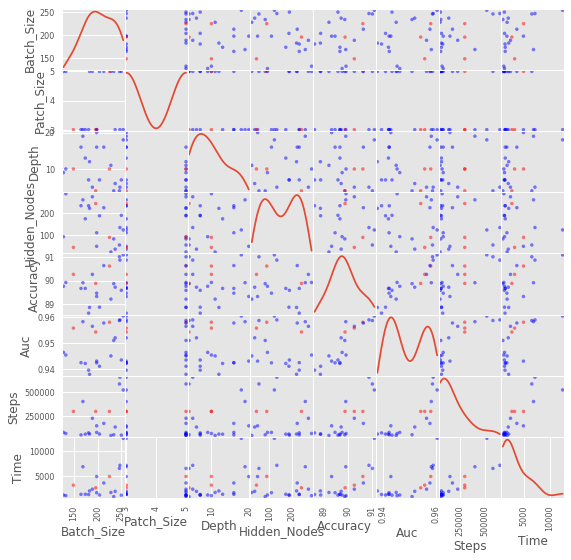

In [7]:
color_wheel = {1: 'r', 
               2: 'b',}
colors = df['Early_Stopped'].map(lambda x: color_wheel.get(x + 1))

plt.style.use('ggplot')
pd.plotting.scatter_matrix(df[['Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes', 'Accuracy', 'Auc', 'Steps', 'Time']], color=colors, diagonal='kde', alpha=0.5, figsize=(9,9))
plt.show()